# Principal Component Analysis EDA on Telecom Churn Data

## Research Question:

#### _"As an exploratory data analysis step in our journey to reducing customer churn rates, to what extent can we explain the most variance of our customer data based on PCA reductions of customer age, income, monthly charges, tenure, usage, and survey results? These results will be used in the logistic regression analysis in the future to focus on a smaller set of 13 continuous variables plus various other categorical variables."_

### Import Libraries/Packages

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import random
from matplotlib import pyplot as plt

### Set Random Seed to obtain the same results every run

In [2]:
random.seed(1234)

### Import my dataset by using pandas::read_csv

In [3]:
url = "C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Dimensionality Reduction/Principal Component Analysis EDA on Telecom Churn Data/Raw Datasets/churn_clean.csv"
churn_data = pd.read_csv(url)
churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Index the data to remove categorical variables and unnecessary columns from our analysis

In [4]:
churn_indexed = churn_data[['Age','Income','Tenure','MonthlyCharge','Bandwidth_GB_Year','Item1','Item2','Item3','Item4'
                            ,'Item5', 'Item6','Item7','Item8']]

### Standardize the dataset to use with PCA

In [5]:
cols = set(churn_indexed.columns)
scaler = StandardScaler()
churn_std = scaler.fit_transform(churn_indexed)
churn_std = pd.DataFrame(churn_std, columns = cols)

In [6]:
churn_std.to_csv("C:/Users/tedda/Desktop/Data Science Portfolio/Machine Learning/Unsupervised Learning/Dimensionality Reduction/Principal Component Analysis EDA on Telecom Churn Data/Cleansed Datasets/standardized_data.csv",header = True)

### Fit the PCA model to the standardized data & print the explained variance

In [7]:
pca = PCA()
pca.fit_transform(churn_std)
print('Each Principal Components Explained Variance Matrix:\n', pca.explained_variance_ratio_)
print('Cumulative Explained Variance Matrix:\n', pca.explained_variance_ratio_.cumsum()) 

Each Principal Components Explained Variance Matrix:
 [0.22673235 0.15352983 0.12581859 0.07789078 0.07689261 0.0762398
 0.06018131 0.05314031 0.04559372 0.04140589 0.03711805 0.02500108
 0.00045566]
Cumulative Explained Variance Matrix:
 [0.22673235 0.38026218 0.50608077 0.58397155 0.66086416 0.73710396
 0.79728528 0.85042559 0.89601931 0.9374252  0.97454325 0.99954434
 1.        ]


### Create a variance variable with the explained variance data from the PCA model

In [8]:
variance = pca.explained_variance_ratio_

### Create an elbow plot by plotting the explained variance ratios above

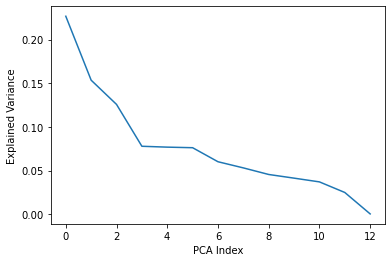

In [9]:
plt.xlabel('PCA Index')
plt.ylabel('Explained Variance')
plt.plot(variance)

### Identify the Explained Variance of Each Principal Component (1-4)

In [10]:
print('Each Principal Components 1-4s Explained Variances:\n',pca.explained_variance_ratio_[0:4])

Each Principal Components 1-4s Explained Variances:
 [0.22673235 0.15352983 0.12581859 0.07789078]


### Identify the Cumulative Explained Variance of the 4 Principal Components combined

In [11]:
print('Cumulative Explained Variance by Principal Components 1-4:\n',pca.explained_variance_ratio_[0:4].cumsum())

Cumulative Explained Variance by Principal Components 1-4:
 [0.22673235 0.38026218 0.50608077 0.58397155]
